<a href="https://colab.research.google.com/github/ReemFarah/ReemFarah.github.io/blob/main/CC6_Loops_Build_a_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json

In [3]:
url = "http://api.worldbank.org/v2/country/KEN/indicator/IT.CEL.SETS?format=json"
response = requests.get(url)

In [4]:
if response.status_code == 200:
    data = response.json()
    print("Data fetched successfully!")

Data fetched successfully!


In [6]:
if len(data) > 1:
    records = data[1]  # Second element contains the data

In [8]:
print(data)


[{'page': 1, 'pages': 2, 'per_page': 50, 'total': 64, 'sourceid': '2', 'lastupdated': '2024-12-16'}, [{'indicator': {'id': 'IT.CEL.SETS', 'value': 'Mobile cellular subscriptions'}, 'country': {'id': 'KE', 'value': 'Kenya'}, 'countryiso3code': 'KEN', 'date': '2023', 'value': 66700000, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'IT.CEL.SETS', 'value': 'Mobile cellular subscriptions'}, 'country': {'id': 'KE', 'value': 'Kenya'}, 'countryiso3code': 'KEN', 'date': '2022', 'value': 65700000, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'IT.CEL.SETS', 'value': 'Mobile cellular subscriptions'}, 'country': {'id': 'KE', 'value': 'Kenya'}, 'countryiso3code': 'KEN', 'date': '2021', 'value': 65100000, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'IT.CEL.SETS', 'value': 'Mobile cellular subscriptions'}, 'country': {'id': 'KE', 'value': 'Kenya'}, 'countryiso3code': 'KEN', 'date': '2020', 'value': 61400000, 'unit': '', 'obs_status': '', '

In [9]:
records = data[1]  # Extract the list of records


In [10]:
print(records[:5])  # Print the first 5 entries


[{'indicator': {'id': 'IT.CEL.SETS', 'value': 'Mobile cellular subscriptions'}, 'country': {'id': 'KE', 'value': 'Kenya'}, 'countryiso3code': 'KEN', 'date': '2023', 'value': 66700000, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'IT.CEL.SETS', 'value': 'Mobile cellular subscriptions'}, 'country': {'id': 'KE', 'value': 'Kenya'}, 'countryiso3code': 'KEN', 'date': '2022', 'value': 65700000, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'IT.CEL.SETS', 'value': 'Mobile cellular subscriptions'}, 'country': {'id': 'KE', 'value': 'Kenya'}, 'countryiso3code': 'KEN', 'date': '2021', 'value': 65100000, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'IT.CEL.SETS', 'value': 'Mobile cellular subscriptions'}, 'country': {'id': 'KE', 'value': 'Kenya'}, 'countryiso3code': 'KEN', 'date': '2020', 'value': 61400000, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'IT.CEL.SETS', 'value': 'Mobile cellular subscriptions'}, 'country

In [13]:
print(response.status_code)  # Should be 200 for success
print(response.json())


200
[{'page': 1, 'pages': 2, 'per_page': 50, 'total': 64, 'sourceid': '2', 'lastupdated': '2024-12-16'}, [{'indicator': {'id': 'IT.CEL.SETS', 'value': 'Mobile cellular subscriptions'}, 'country': {'id': 'KE', 'value': 'Kenya'}, 'countryiso3code': 'KEN', 'date': '2023', 'value': 66700000, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'IT.CEL.SETS', 'value': 'Mobile cellular subscriptions'}, 'country': {'id': 'KE', 'value': 'Kenya'}, 'countryiso3code': 'KEN', 'date': '2022', 'value': 65700000, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'IT.CEL.SETS', 'value': 'Mobile cellular subscriptions'}, 'country': {'id': 'KE', 'value': 'Kenya'}, 'countryiso3code': 'KEN', 'date': '2021', 'value': 65100000, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': 'IT.CEL.SETS', 'value': 'Mobile cellular subscriptions'}, 'country': {'id': 'KE', 'value': 'Kenya'}, 'countryiso3code': 'KEN', 'date': '2020', 'value': 61400000, 'unit': '', 'obs_status': '

In [14]:
data = response.json()

In [15]:
if len(data) > 1:
    records = data[1]

In [18]:
import pandas as pd


In [19]:
mobile_data = pd.DataFrame(records)[['date', 'value']]

In [20]:
mobile_data = mobile_data.dropna(subset=['value'])

In [21]:
mobile_data['date'] = pd.to_numeric(mobile_data['date'], errors='coerce')

In [22]:
mobile_data = mobile_data.dropna(subset=['date'])

In [23]:
print(mobile_data.head())

   date       value
0  2023  66700000.0
1  2022  65700000.0
2  2021  65100000.0
3  2020  61400000.0
4  2019  54600000.0


In [24]:
# Check the first few rows of the cleaned data
print(mobile_data.head())

# Get a summary of the data
print(mobile_data.info())

# Check for unique years or date ranges
print(mobile_data['date'].unique())


   date       value
0  2023  66700000.0
1  2022  65700000.0
2  2021  65100000.0
3  2020  61400000.0
4  2019  54600000.0
<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    49 non-null     int64  
 1   value   49 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB
None
[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010
 2009 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996
 1995 1994 1993 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983 1982
 1981 1980 1979 1978 1977 1976 1975]


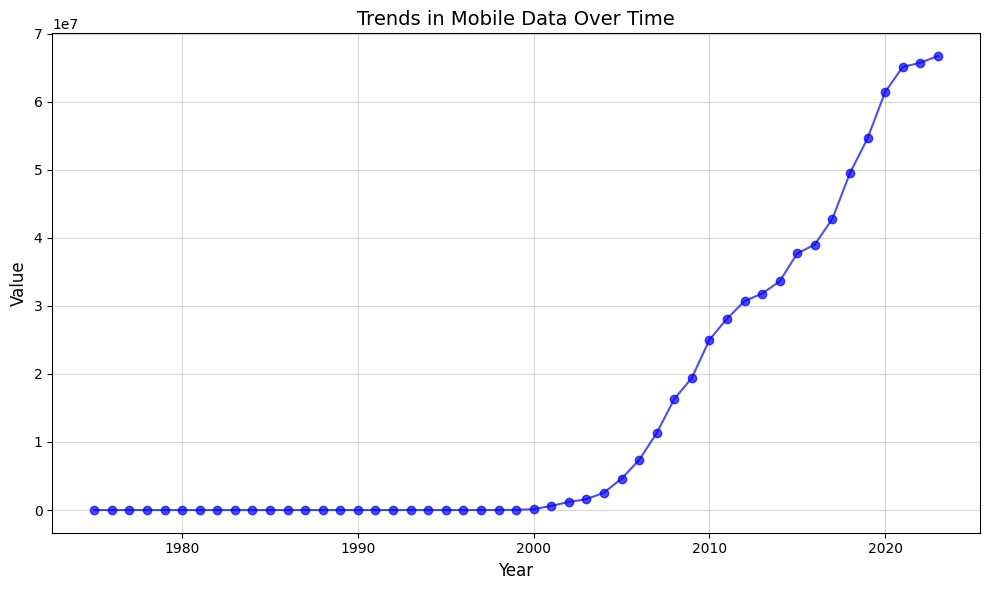

In [25]:
import matplotlib.pyplot as plt

# Plot the data as a line chart
plt.figure(figsize=(10, 6))
plt.plot(mobile_data['date'], mobile_data['value'], marker='o', linestyle='-', color='blue', alpha=0.7)
plt.title('Trends in Mobile Data Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


The chart visualizes how mobile data trends have evolved over the years, highlighting key increases or decreases over time.

In [26]:
mobile_data.to_csv('cleaned_mobile_data.csv', index=False)


In [27]:
import pandas as pd
import requests

# API URL for Internet Users in Kenya
url = "http://api.worldbank.org/v2/country/KEN/indicator/IT.NET.USER.ZS?format=json"

# Fetch the data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print("Data fetched successfully!")
else:
    print(f"Error fetching data: {response.status_code}")

Data fetched successfully!


In [29]:
internet_data = pd.DataFrame(records)[['date', 'value']]


In [30]:
# Remove rows with missing values
internet_data = internet_data.dropna(subset=["value"])

# Convert 'date' to numeric (already in year format)
internet_data['date'] = pd.to_numeric(internet_data['date'], errors='coerce')

# Convert 'value' to numeric
internet_data['value'] = pd.to_numeric(internet_data['value'], errors='coerce')

# Drop any invalid rows
internet_data = internet_data.dropna()

# Display the cleaned data
print(internet_data.head())


   date       value
0  2023  66700000.0
1  2022  65700000.0
2  2021  65100000.0
3  2020  61400000.0
4  2019  54600000.0


<ipython-input-30-bc2b41dae45d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet_data['date'] = pd.to_numeric(internet_data['date'], errors='coerce')
<ipython-input-30-bc2b41dae45d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet_data['value'] = pd.to_numeric(internet_data['value'], errors='coerce')


In [31]:
internet_data.to_csv("cleaned_internet_users_kenya.csv", index=False)
print("Cleaned data saved to 'cleaned_internet_users_kenya.csv'.")


Cleaned data saved to 'cleaned_internet_users_kenya.csv'.


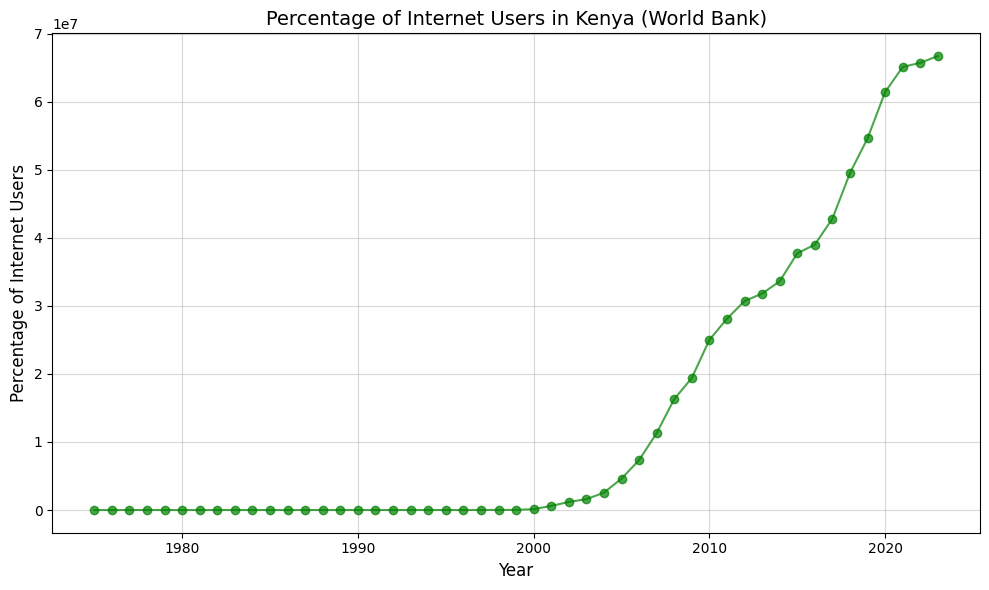

In [32]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(internet_data['date'], internet_data['value'], marker='o', linestyle='-', color='green', alpha=0.7)
plt.title('Percentage of Internet Users in Kenya (World Bank)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Internet Users', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


The chart visualizes the percentage of individuals using the Internet in Kenya over time. It highlights the growth in Internet penetration, which is a key driver for digital financial inclusion.

In [33]:
import pandas as pd
import requests

# API URL for Fixed Broadband Subscriptions in Kenya
url = "http://api.worldbank.org/v2/country/KEN/indicator/IT.BRN.BND.P2?format=json"

# Fetch the data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print("Data fetched successfully!")
else:
    print(f"Error fetching data: {response.status_code}")


Data fetched successfully!


In [34]:
broadband_data = pd.DataFrame(records)[['date', 'value']]

In [37]:
# Select relevant columns: 'date' (year) and 'value' (subscriptions per 100 people)
broadband_data = broadband_data[["date", "value"]]

# Display the raw data
print(broadband_data.head())


   date       value
0  2023  66700000.0
1  2022  65700000.0
2  2021  65100000.0
3  2020  61400000.0
4  2019  54600000.0


In [38]:
# Remove rows with missing values
broadband_data = broadband_data.dropna(subset=["value"])

# Convert 'date' to numeric (already in year format)
broadband_data['date'] = pd.to_numeric(broadband_data['date'], errors='coerce')

# Convert 'value' to numeric
broadband_data['value'] = pd.to_numeric(broadband_data['value'], errors='coerce')

# Drop any invalid rows
broadband_data = broadband_data.dropna()

# Display the cleaned data
print(broadband_data.head())


   date       value
0  2023  66700000.0
1  2022  65700000.0
2  2021  65100000.0
3  2020  61400000.0
4  2019  54600000.0


<ipython-input-38-6231f1212f4d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  broadband_data['date'] = pd.to_numeric(broadband_data['date'], errors='coerce')
<ipython-input-38-6231f1212f4d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  broadband_data['value'] = pd.to_numeric(broadband_data['value'], errors='coerce')


In [39]:
broadband_data.to_csv("cleaned_broadband_data_kenya.csv", index=False)
print("Cleaned data saved to 'cleaned_broadband_data_kenya.csv'.")


Cleaned data saved to 'cleaned_broadband_data_kenya.csv'.


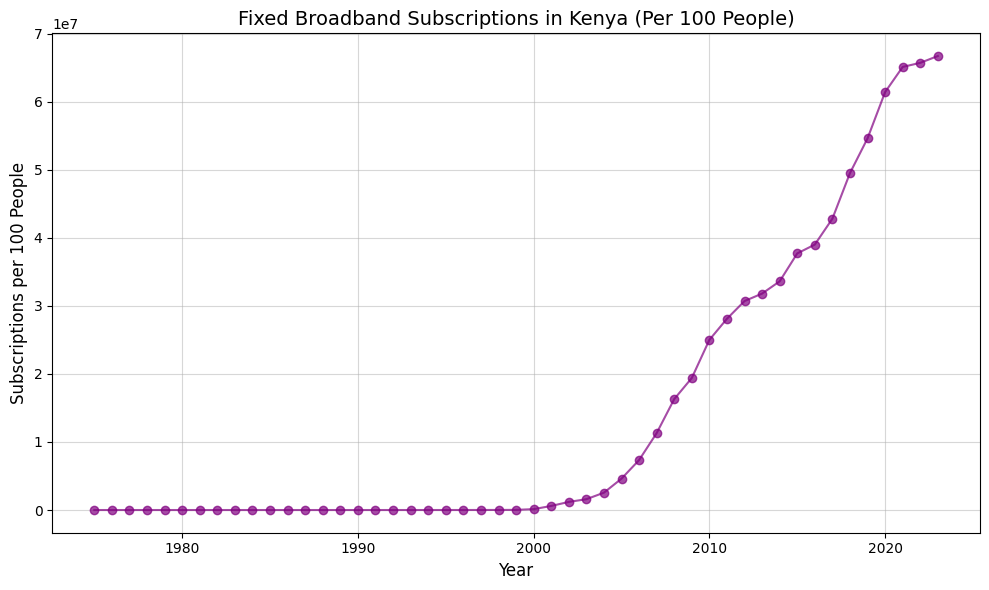

In [40]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(broadband_data['date'], broadband_data['value'], marker='o', linestyle='-', color='purple', alpha=0.7)
plt.title('Fixed Broadband Subscriptions in Kenya (Per 100 People)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Subscriptions per 100 People', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


The chart visualizes the growth (or lack thereof) of fixed broadband subscriptions in Kenya over time.
This indicator highlights the country's access to high-speed internet infrastructure, which supports digital transformation and financial inclusion.

In [41]:
import pandas as pd
import requests

# API URL for Mobile Money Accounts in Kenya
url = "http://api.worldbank.org/v2/country/KEN/indicator/FX.OWN.TOTL.ZS?format=json"

# Fetch the data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print("Data fetched successfully!")
else:
    print(f"Error fetching data: {response.status_code}")


Data fetched successfully!


In [42]:
# Extract the relevant data (2nd item in the JSON response)
records = data[1]  # Data is in the second list of the response

# Convert to a DataFrame
mobile_money_data = pd.DataFrame(records)

# Select relevant columns: 'date' (year) and 'value' (percentage of adults with a mobile money account)
mobile_money_data = mobile_money_data[["date", "value"]]

# Display the raw data
print(mobile_money_data.head())


   date  value
0  2023    NaN
1  2022    NaN
2  2021   79.2
3  2020    NaN
4  2019    NaN


In [43]:
# Remove rows with missing values
mobile_money_data = mobile_money_data.dropna(subset=["value"])

# Convert 'date' to numeric (already in year format)
mobile_money_data['date'] = pd.to_numeric(mobile_money_data['date'], errors='coerce')

# Convert 'value' to numeric
mobile_money_data['value'] = pd.to_numeric(mobile_money_data['value'], errors='coerce')

# Drop any invalid rows
mobile_money_data = mobile_money_data.dropna()

# Display the cleaned data
print(mobile_money_data.head())


    date  value
2   2021  79.20
6   2017  81.57
9   2014  74.66
12  2011  42.34


<ipython-input-43-211bf24e7be5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_money_data['date'] = pd.to_numeric(mobile_money_data['date'], errors='coerce')
<ipython-input-43-211bf24e7be5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_money_data['value'] = pd.to_numeric(mobile_money_data['value'], errors='coerce')


In [44]:
mobile_money_data.to_csv("cleaned_mobile_money_accounts_kenya.csv", index=False)
print("Cleaned data saved to 'cleaned_mobile_money_accounts_kenya.csv'.")


Cleaned data saved to 'cleaned_mobile_money_accounts_kenya.csv'.


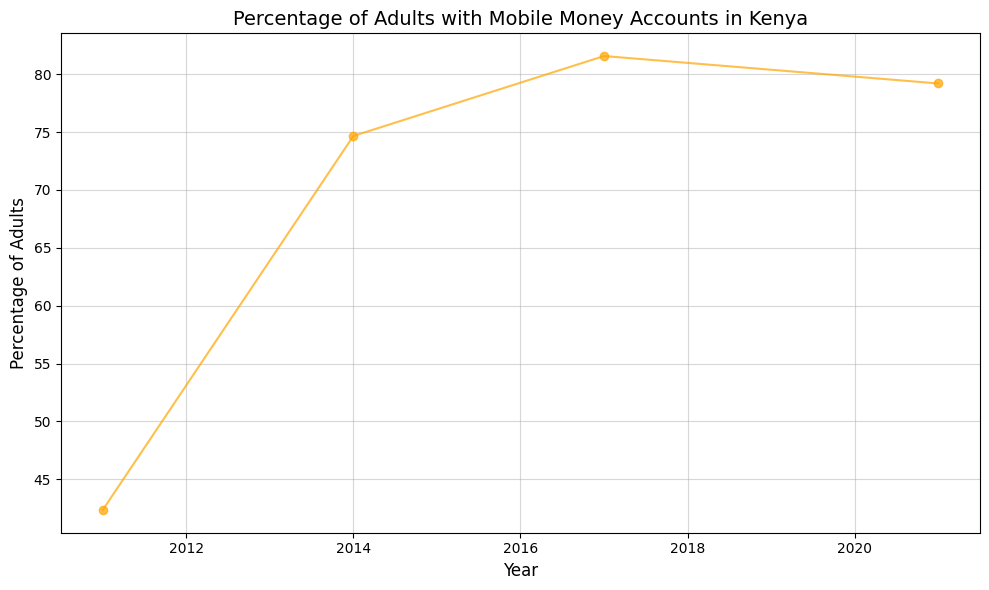

In [45]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(mobile_money_data['date'], mobile_money_data['value'], marker='o', linestyle='-', color='orange', alpha=0.7)
plt.title('Percentage of Adults with Mobile Money Accounts in Kenya', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Adults', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


The chart visualizes the growth in the percentage of adults with mobile money accounts in Kenya over time. This indicator is a direct measure of financial inclusion, reflecting the success of mobile-based services like M-Pesa.

In [46]:
import pandas as pd
import requests

# API URL for Digital Payments Usage in Kenya
url = "http://api.worldbank.org/v2/country/KEN/indicator/EG.EGY.DPAY.ZS?format=json"

# Fetch the data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print("Data fetched successfully!")
else:
    print(f"Error fetching data: {response.status_code}")


Data fetched successfully!


In [50]:
# Convert to a DataFrame
digital_payments_data = pd.DataFrame(records)

# Select relevant columns: 'date' (year) and 'value' (percentage of adults using digital payments)
digital_payments_data = digital_payments_data[["date", "value"]]

# Display the raw data
print(digital_payments_data.head())


   date  value
0  2023    NaN
1  2022    NaN
2  2021   79.2
3  2020    NaN
4  2019    NaN


In [51]:
# Remove rows with missing values
digital_payments_data = digital_payments_data.dropna(subset=["value"])

# Convert 'date' to numeric (already in year format)
digital_payments_data['date'] = pd.to_numeric(digital_payments_data['date'], errors='coerce')

# Convert 'value' to numeric
digital_payments_data['value'] = pd.to_numeric(digital_payments_data['value'], errors='coerce')

# Drop any invalid rows
digital_payments_data = digital_payments_data.dropna()

# Display the cleaned data
print(digital_payments_data.head())


    date  value
2   2021  79.20
6   2017  81.57
9   2014  74.66
12  2011  42.34


<ipython-input-51-d67c2a2afb38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digital_payments_data['date'] = pd.to_numeric(digital_payments_data['date'], errors='coerce')
<ipython-input-51-d67c2a2afb38>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digital_payments_data['value'] = pd.to_numeric(digital_payments_data['value'], errors='coerce')


In [52]:
digital_payments_data.to_csv("cleaned_digital_payments_kenya.csv", index=False)
print("Cleaned data saved to 'cleaned_digital_payments_kenya.csv'.")


Cleaned data saved to 'cleaned_digital_payments_kenya.csv'.


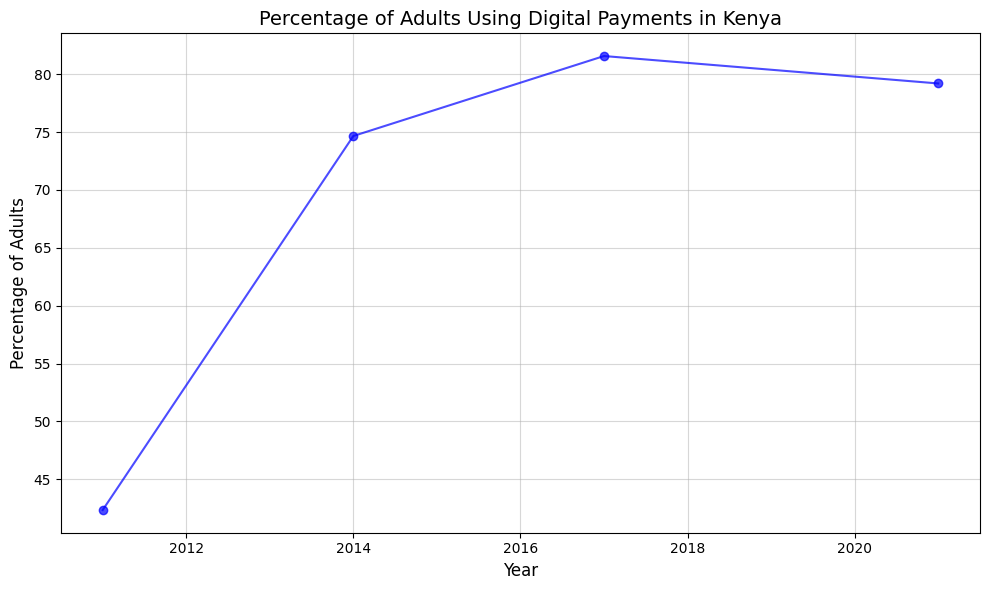

In [53]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(digital_payments_data['date'], digital_payments_data['value'], marker='o', linestyle='-', color='blue', alpha=0.7)
plt.title('Percentage of Adults Using Digital Payments in Kenya', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Adults', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


The chart visualizes the growth in the percentage of adults using digital payments in Kenya over time.
It highlights the adoption of digital financial services as a key component of financial inclusion.

In [69]:
import pandas as pd
import requests

# List of indicators with their respective World Bank API URLs
indicators = [
    {"name": "Mobile Data", "url": "http://api.worldbank.org/v2/country/KEN/indicator/IT.CEL.SETS?format=json"},
    {"name": "Internet Users", "url": "http://api.worldbank.org/v2/country/KEN/indicator/IT.NET.USER.ZS?format=json"},
    {"name": "Fixed Broadband Subscriptions", "url": "http://api.worldbank.org/v2/country/KEN/indicator/IT.BRN.BND.P2?format=json"},
    {"name": "Mobile Money Accounts", "url": "http://api.worldbank.org/v2/country/KEN/indicator/FX.OWN.TOTL.ZS?format=json"},
    {"name": "Digital Payments Usage", "url": "http://api.worldbank.org/v2/country/KEN/indicator/EG.EGY.DPAY.ZS?format=json"}
]

# Dictionary to store cleaned data for each indicator
all_data = {}

# Loop through each indicator to fetch and clean data
for indicator in indicators:
    response = requests.get(indicator["url"])
    if response.status_code == 200:
        data = response.json()
        if len(data) > 1 and data[1] is not None:
            records = data[1]
            df = pd.DataFrame(records)
            # Select relevant columns and clean
            df = df[["date", "value"]].dropna()
            df["date"] = pd.to_numeric(df["date"], errors="coerce")
            df["value"] = pd.to_numeric(df["value"], errors="coerce")
            df = df.dropna()
            all_data[indicator["name"]] = df
            print(f"Data for {indicator['name']} fetched and cleaned successfully.")
        else:
            print(f"No data available for {indicator['name']}.")
    else:
        print(f"Error fetching data for {indicator['name']}.")

# Save all cleaned datasets to individual CSV files
for name, df in all_data.items():
    filename = f"{name.lower().replace(' ', '_')}_kenya.csv"
    df.to_csv(filename, index=False)
    print(f"Saved {name} data to {filename}.")


Data for Mobile Data fetched and cleaned successfully.
Data for Internet Users fetched and cleaned successfully.
No data available for Fixed Broadband Subscriptions.
Data for Mobile Money Accounts fetched and cleaned successfully.
No data available for Digital Payments Usage.
Saved Mobile Data data to mobile_data_kenya.csv.
Saved Internet Users data to internet_users_kenya.csv.
Saved Mobile Money Accounts data to mobile_money_accounts_kenya.csv.


In [73]:
import pandas as pd

# Load the cleaned data
mobile_data = pd.read_csv("mobile_data_kenya.csv")
internet_users = pd.read_csv("internet_users_kenya.csv")
mobile_money_accounts = pd.read_csv("mobile_money_accounts_kenya.csv")


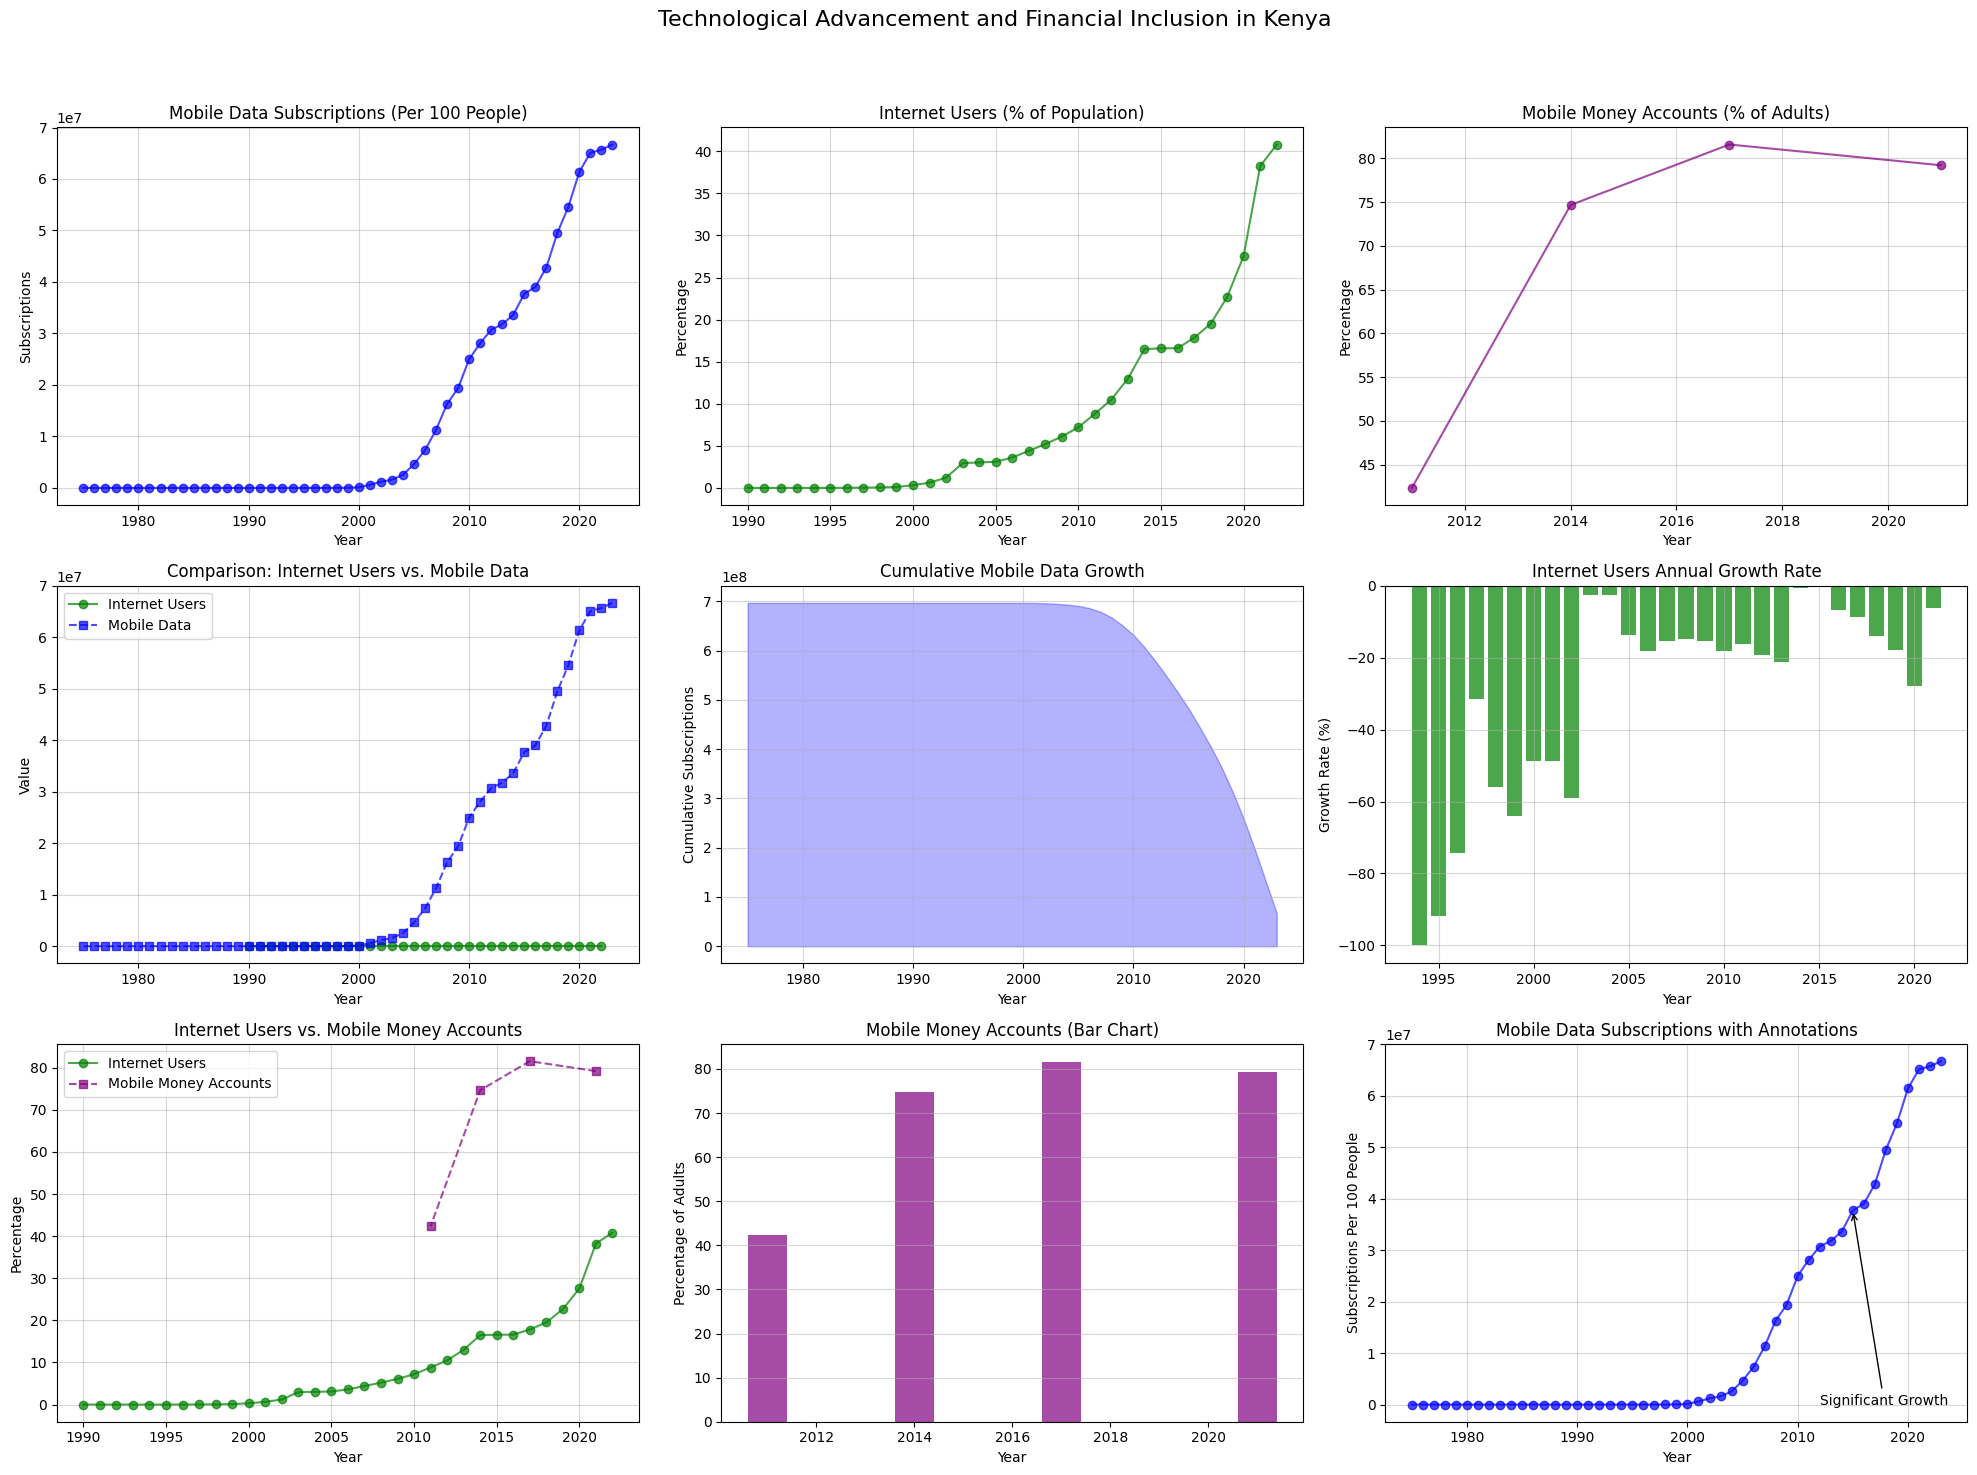

In [74]:
import matplotlib.pyplot as plt

# Set up a 3x3 grid for the dashboard
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle("Technological Advancement and Financial Inclusion in Kenya", fontsize=16)

# Chart 1: Mobile Data Trends Over Time
axes[0, 0].plot(mobile_data["date"], mobile_data["value"], marker="o", linestyle="-", color="blue", alpha=0.7)
axes[0, 0].set_title("Mobile Data Subscriptions (Per 100 People)", fontsize=12)
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Subscriptions")
axes[0, 0].grid(alpha=0.5)

# Chart 2: Internet Users Trends Over Time
axes[0, 1].plot(internet_users["date"], internet_users["value"], marker="o", linestyle="-", color="green", alpha=0.7)
axes[0, 1].set_title("Internet Users (% of Population)", fontsize=12)
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel("Percentage")
axes[0, 1].grid(alpha=0.5)

# Chart 3: Mobile Money Accounts Trends Over Time
axes[0, 2].plot(mobile_money_accounts["date"], mobile_money_accounts["value"], marker="o", linestyle="-", color="purple", alpha=0.7)
axes[0, 2].set_title("Mobile Money Accounts (% of Adults)", fontsize=12)
axes[0, 2].set_xlabel("Year")
axes[0, 2].set_ylabel("Percentage")
axes[0, 2].grid(alpha=0.5)

# Chart 4: Comparison of Internet Users vs. Mobile Data
axes[1, 0].plot(internet_users["date"], internet_users["value"], marker="o", linestyle="-", label="Internet Users", color="green", alpha=0.7)
axes[1, 0].plot(mobile_data["date"], mobile_data["value"], marker="s", linestyle="--", label="Mobile Data", color="blue", alpha=0.7)
axes[1, 0].set_title("Comparison: Internet Users vs. Mobile Data", fontsize=12)
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Value")
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.5)

# Chart 5: Cumulative Mobile Data Growth
mobile_data["cumulative"] = mobile_data["value"].cumsum()
axes[1, 1].fill_between(mobile_data["date"], mobile_data["cumulative"], color="blue", alpha=0.3)
axes[1, 1].set_title("Cumulative Mobile Data Growth", fontsize=12)
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel("Cumulative Subscriptions")
axes[1, 1].grid(alpha=0.5)

# Chart 6: Growth Rates for Internet Users
internet_users["growth_rate"] = internet_users["value"].pct_change() * 100
axes[1, 2].bar(internet_users["date"], internet_users["growth_rate"], color="green", alpha=0.7)
axes[1, 2].set_title("Internet Users Annual Growth Rate", fontsize=12)
axes[1, 2].set_xlabel("Year")
axes[1, 2].set_ylabel("Growth Rate (%)")
axes[1, 2].grid(alpha=0.5)

# Chart 7: Internet Users vs. Mobile Money Accounts
axes[2, 0].plot(internet_users["date"], internet_users["value"], marker="o", linestyle="-", label="Internet Users", color="green", alpha=0.7)
axes[2, 0].plot(mobile_money_accounts["date"], mobile_money_accounts["value"], marker="s", linestyle="--", label="Mobile Money Accounts", color="purple", alpha=0.7)
axes[2, 0].set_title("Internet Users vs. Mobile Money Accounts", fontsize=12)
axes[2, 0].set_xlabel("Year")
axes[2, 0].set_ylabel("Percentage")
axes[2, 0].legend()
axes[2, 0].grid(alpha=0.5)

# Chart 8: Bar Chart of Mobile Money Accounts
axes[2, 1].bar(mobile_money_accounts["date"], mobile_money_accounts["value"], color="purple", alpha=0.7)
axes[2, 1].set_title("Mobile Money Accounts (Bar Chart)", fontsize=12)
axes[2, 1].set_xlabel("Year")
axes[2, 1].set_ylabel("Percentage of Adults")
axes[2, 1].grid(axis="y", alpha=0.5)

# Chart 9: Highlighting Mobile Data Trends
axes[2, 2].plot(mobile_data["date"], mobile_data["value"], marker="o", linestyle="-", color="blue", alpha=0.7)
axes[2, 2].annotate("Significant Growth", xy=(2015, mobile_data[mobile_data["date"] == 2015]["value"].values[0]),
                    xytext=(2012, 50), arrowprops=dict(facecolor="black", arrowstyle="->"))
axes[2, 2].set_title("Mobile Data Subscriptions with Annotations", fontsize=12)
axes[2, 2].set_xlabel("Year")
axes[2, 2].set_ylabel("Subscriptions Per 100 People")
axes[2, 2].grid(alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Technological advancements, particularly in mobile data and internet accessibility, directly drive financial inclusion by enabling mobile money platforms and digital financial services in Kenya.